In [11]:
import pandas as pd
import numpy as np
import shared
import json
import joblib
import graphviz

ve_or_ju = "ju"

In [12]:
with open(f"data/top_countries_{ve_or_ju}.json") as json_file:
    top_countries = json.load(json_file)
top_countries    

['FIN',
 'SWE',
 'NOR',
 'RUS',
 'LAT',
 'EST',
 'SUI',
 'GBR',
 'LTU',
 'GER',
 'DEN',
 'FRA',
 'ESP',
 'CZE',
 'ITA',
 'POL',
 'USA',
 'UKR',
 'HUN']

In [13]:
with open(f"data/top_first_names_{ve_or_ju}.json") as json_file:
    top_first_names = json.load(json_file)
top_first_names 

['mikko',
 'antti',
 'timo',
 'juha',
 'matti',
 'jukka',
 'pekka',
 'mika',
 'jari',
 'jussi',
 'janne',
 'ville',
 'hannu',
 'heikki',
 'kari',
 'markku',
 'petri',
 'sami',
 'tuomas',
 'teemu',
 'marko',
 'harri',
 'lauri',
 'markus',
 'ari',
 'pasi',
 'vesa',
 'olli',
 'jouni',
 'jaakko',
 'eero',
 'arto',
 'tero',
 'juho',
 'tommi',
 'kimmo',
 'jani',
 'jarmo',
 'seppo',
 'risto',
 'tomi',
 'ilkka',
 'esa',
 'jarkko',
 'kalle',
 'tuomo',
 'tapio',
 'jyrki',
 'anders',
 'johan',
 'jorma',
 'simo',
 'erkki',
 'erik',
 'toni',
 'juhani',
 'petteri',
 'jouko',
 'jonas',
 'mikael',
 'joonas',
 'henrik',
 'lasse',
 'pertti',
 'aleksi',
 'martin',
 'henri',
 'jan',
 'aki',
 'niko',
 'samuli',
 'andreas',
 'anssi',
 'juuso',
 'esko',
 'pauli',
 'matias',
 'fredrik',
 'paavo',
 'miika',
 'joni',
 'peter',
 'riku',
 'niklas',
 'anton',
 'tapani',
 'daniel',
 'reijo',
 'martti',
 'kai',
 'jarno',
 'panu',
 'raimo',
 'thomas',
 'stefan',
 'keijo',
 'per',
 'magnus',
 'simon',
 'pentti',
 'sak

In [15]:
history = pd.read_csv('data/grouped_paces_ju.tsv', delimiter="\t")
history.head()

,mean_team_id,teams,name,num_runs,num_valid_times,mean_pace,stdev,most_common_leg,most_common_country,pace_1,pace_2,pace_3,pace_4,pace_5,pace_6,pace_7
0,18.5,KOOVEE,joni hirvikallio,6,5,5.905,0.177,1,FIN,5.873,5.762,6.251,5.843,5.796,NaN,NaN
1,12.0,KOOVEE,topi anjala,7,7,6.051,0.483,1,FIN,5.882,5.621,6.100,5.977,7.164,5.642,5.974
2,3.0,DELTA;HIIDENKIERTÄJÄT;KOOVEE,lauri sild,7,7,5.933,0.382,2,FIN,5.836,5.851,5.996,5.829,6.765,5.391,5.866
3,18.0,OK ORION;KOOVEE,oleksandr kratov,3,3,6.069,0.363,4,SWE,5.703,5.940,6.563,NaN,NaN,NaN,NaN
4,21.0,KANGASALA SK;KOOVEE,kenny kivikas,7,5,5.936,0.345,7,FIN,5.603,5.662,5.837,6.014,6.562,NaN,NaN


In [16]:
# HISTORY: ""mean_team_id"	"teams"	"name"	"num_runs"	"num_valid_times"	"mean_pace"	"stdev"	"most_common_leg"	"most_common_country"	
# "pace_1"	"pace_2"	"pace_3"	"pace_4"	"pace_5"	"pace_6"	"pace_7"
# RUNS: "team"	"team_country"	"pace"	"leg_nro"	"num_runs"
history["year"] = "NA"
history["pace"] = "NA"
history["team"] = "NA"
history["leg_nro"] = history["most_common_leg"]
history["team_id"] = history["mean_team_id"]
history["team_country"] = history["most_common_country"]

history['first_name']=history['name']




In [17]:
history[history["num_runs"] > 4]

,mean_team_id,teams,name,num_runs,num_valid_times,mean_pace,stdev,most_common_leg,most_common_country,pace_1,...,pace_5,pace_6,pace_7,year,pace,team,leg_nro,team_id,team_country,first_name
0,18.5,KOOVEE,joni hirvikallio,6,5,5.905,0.177,1,FIN,5.873,...,5.796,NaN,NaN,NA,NA,NA,1,18.5,FIN,joni hirvikallio
1,12.0,KOOVEE,topi anjala,7,7,6.051,0.483,1,FIN,5.882,...,7.164,5.642,5.974,NA,NA,NA,1,12.0,FIN,topi anjala
2,3.0,DELTA;HIIDENKIERTÄJÄT;KOOVEE,lauri sild,7,7,5.933,0.382,2,FIN,5.836,...,6.765,5.391,5.866,NA,NA,NA,2,3.0,FIN,lauri sild
4,21.0,KANGASALA SK;KOOVEE,kenny kivikas,7,5,5.936,0.345,7,FIN,5.603,...,6.562,NaN,NaN,NA,NA,NA,7,21.0,FIN,kenny kivikas
5,3.0,DELTA;HIIDENKIERTÄJÄT;KOOVEE,timo sild,7,7,5.630,0.335,6,FIN,5.526,...,6.293,5.346,5.748,NA,NA,NA,6,3.0,FIN,timo sild
6,5.5,KOOVEE;KRISTIANSAND OK,daniel hubmann,6,6,5.646,0.520,7,FIN,5.294,...,6.752,5.432,NaN,NA,NA,NA,7,5.5,FIN,daniel hubmann
8,12.0,MARKBYGDENS OK;IFK GÖTEBORG,johan högstrand,5,5,6.117,0.449,2,SWE,5.794,...,6.728,NaN,NaN,NA,NA,NA,2,12.0,SWE,johan högstrand
9,9.0,IFK GÖTEBORG,vetle ruud bråten,5,5,5.705,0.185,3,SWE,5.525,...,6.060,NaN,NaN,NA,NA,NA,3,9.0,SWE,vetle ruud bråten
10,16.0,IFK GÖTEBORG,jonas pilblad,6,6,6.154,0.389,2,SWE,6.509,...,5.756,6.089,NaN,NA,NA,NA,2,16.0,SWE,jonas pilblad
11,85.5,IFK GÖTEBORG;NYKÖPINGS OK,jens wängdahl,6,5,6.181,0.341,3,SWE,5.826,...,6.600,NaN,NaN,NA,NA,NA,3,85.5,SWE,jens wängdahl


In [18]:
ve_data = pd.read_csv(f'data/runs_ve.tsv', delimiter="\t")
ve_data["first_name"] = ve_data.name.str.split(" ", expand=True).iloc[:, 0]

In [19]:
#features = shared.preprocess_features(history, top_countries, top_first_names)
features = shared.preprocess_features_ve(history, ve_data, top_countries)
features.info()

,mean_team_id,teams,name,num_runs,num_valid_times,mean_pace,stdev,most_common_leg,most_common_country,pace_1,...,pace_5,pace_6,pace_7,year,pace,team,leg_nro,team_id,team_country,first_name
0,18.5,KOOVEE,joni hirvikallio,6,5,5.905,0.177,1,FIN,5.873,...,5.796,NaN,NaN,NA,NA,NA,1,18.5,FIN,joni hirvikallio
1,12.0,KOOVEE,topi anjala,7,7,6.051,0.483,1,FIN,5.882,...,7.164,5.642,5.974,NA,NA,NA,1,12.0,FIN,topi anjala
2,3.0,DELTA;HIIDENKIERTÄJÄT;KOOVEE,lauri sild,7,7,5.933,0.382,2,FIN,5.836,...,6.765,5.391,5.866,NA,NA,NA,2,3.0,FIN,lauri sild
3,18.0,OK ORION;KOOVEE,oleksandr kratov,3,3,6.069,0.363,4,SWE,5.703,...,NaN,NaN,NaN,NA,NA,NA,4,18.0,SWE,oleksandr kratov
4,21.0,KANGASALA SK;KOOVEE,kenny kivikas,7,5,5.936,0.345,7,FIN,5.603,...,6.562,NaN,NaN,NA,NA,NA,7,21.0,FIN,kenny kivikas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30755 entries, 0 to 30754
Data columns (total 8 columns):
team_id          30755 non-null float64
team_id_log10    30755 non-null float64
c                30755 non-null object
runs             30755 non-null int64
ve_name          30755 non-null int64
leg              30755 non-null object
name             30755 non-null int64
pace             30755 non-null object
dtypes: float64(2), int64(3), object(3)
memory usage: 1.9+ MB


In [20]:
x = features.values
x.shape

(30755, 8)

In [27]:

#pmlearn_linear = joblib.load('pmlearn_linear.sav')
gbr = joblib.load('gbr.sav')
gbr_q_low = joblib.load('gbr_q_low.sav')
gbr_q_high = joblib.load('gbr_q_high.sav')


In [28]:
#pmlearn_preds = pmlearn_linear.predict(features, return_std=True)
gbr_preds = gbr.predict(features)
gbr_q_low_preds = gbr_q_low.predict(features)
gbr_q_high_preds = gbr_q_high.predict(features)

ValueError: could not convert string to float: 'NA'

In [23]:
gbr_preds

NameError: name 'gbr_preds' is not defined

In [24]:
gbr_sd_estimate = pd.DataFrame({
    'q_low':np.exp(gbr_q_low_preds),
    'predicted':np.exp(gbr_preds), 
    'q_high':np.exp(gbr_q_high_preds), 
})

# Propably unjustified way to estimate standard deviation
gbr_sd_estimate["std"] = (gbr_sd_estimate.q_high - gbr_sd_estimate.q_low) / 2

display(gbr_sd_estimate.head(15).round(3))
display(gbr_sd_estimate["std"].mean())


NameError: name 'gbr_q_low_preds' is not defined

In [ ]:
#history['prior_mean'] = np.exp(pmlearn_preds[0])
#history['prior_std'] = np.exp(pmlearn_preds[1])
history['prior_mean'] = gbr_sd_estimate["predicted"]
history['prior_std'] = gbr_sd_estimate["std"]


In [ ]:
history['prior_mean_error'] = np.abs(history['prior_mean'] - history['mean_pace'])
display(np.mean(history['prior_mean_error']))
history['prior_mean_error_in_sd'] = history['prior_mean_error'] / history['stdev']
display(np.mean(history['prior_mean_error_in_sd']))
display(np.mean(np.abs(history['prior_std'] - history['stdev'])))

In [ ]:
history.head(10)

In [ ]:
#history[np.logical_and(history['teams'].str.contains("REAK"), history['num_runs'] < 2)]
display(np.mean(history[history['num_runs'] == 1]["prior_mean_error"]))
display(np.mean(history[history['num_runs'] == 2]["prior_mean_error"]))
display(np.mean(history[history['num_runs'] == 3]["prior_mean_error"]))
display(np.mean(history[history['num_runs'] == 4]["prior_mean_error"]))
display(np.mean(history[history['num_runs'] == 5]["prior_mean_error"]))
display(np.mean(history[history['num_runs'] == 6]["prior_mean_error"]))
display(np.mean(history[history['num_runs'] == 7]["prior_mean_error"]))

display(np.mean(history[history['num_runs'] == 1]["prior_std"]))
display(np.mean(history[history['num_runs'] == 2]["prior_std"]))
display(np.mean(history[history['num_runs'] == 3]["prior_std"]))
display(np.mean(history[history['num_runs'] == 4]["prior_std"]))
display(np.mean(history[history['num_runs'] == 5]["prior_std"]))
display(np.mean(history[history['num_runs'] == 6]["prior_std"]))
display(np.mean(history[history['num_runs'] == 7]["prior_std"]))

In [ ]:

#runner = history[history['name'].str.contains("oskari pirttikoski") | history['name'].str.contains("freeman") | history['name'].str.contains("pasi huhtiniemi")]
#runner = history[np.logical_and(history['teams'].str.contains("REAK"), history["num_valid_times"] > 1)] 
#runner = history[np.isfinite(history["pace_7"])] 
runner = history[history["num_valid_times"] > 2] 

display(runner[["name", "num_valid_times", "mean_pace", "stdev", "prior_mean", "prior_std"]])
##runner runner = history[np.isfinite(history["pace_7"])] 
#runner = history[np.isfinite(= history[history['name'].str.contains("freeman")]] 

#display(runner["prior_mean"])
#display(runner["prior_std_correct"])
#pace_col_names = [f"pace_{index}" for index in range(1,8)]
paces = runner[["pace_1", "pace_2", "pace_3", "pace_4", "pace_5", "pace_6", "pace_7"]]


In [ ]:
history[["stdev", "prior_std"]].describe(percentiles=[0.05, .25, .5, .75, .95, .99])


In [ ]:
log_stds = np.clip(np.log(runner["prior_std"]), 0.1, 3.5).values
np.min(log_stds)

In [ ]:
import multiprocessing
multiprocessing.cpu_count()

In [55]:
J=np.log(paces).T.shape
display(J)
import pymc3 as pm
with pm.Model() as hierarchial:
    
    #prior for runner
    mu = pm.Normal('mu', mu=np.log(runner["prior_mean"]).values, sd=log_stds, shape=J[1])
    #std err of effect
    sigma = pm.Lognormal('sigma',mu=log_stds, sd=0.5, shape=J[1])
    
    # random shift
    theta_tilde = pm.Normal('theta_tilde', 0, 1, shape=J)
    tau = pm.HalfCauchy('tau', beta=5)
    #theta = pm.Normal('theta', mu=mu, sd=tau, shape=J)
    
    #expected value
    theta = pm.Deterministic('theta', mu + tau*theta_tilde)
    #likelihood
    obs = pm.Normal('obs', mu=theta, sd=sigma, observed=np.log(paces).T)

(7, 11541)

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
/Users/tjpajala/.local/share/virtualenvs/jukola-o50OmWo4/lib/python3.6/site-packages/pymc3/model.py:1266: UserWarning: Data in obs contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, UserWarning)
/Users/tjpajala/.local/share/virtualenvs/jukola-o50OmWo4/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/tjpajala/.local/share/virtualenvs/jukola-o50OmWo4/lib/python3.6/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depreca

In [69]:
import pymc3 as pm
J=np.log(paces).T.shape
display(J)
display(log_stds.shape)
sigma = log_stds
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sd=5)
    tau = pm.HalfCauchy('tau', beta=5)
    theta_tilde = pm.Normal('theta_tilde', 0, 1, shape=J)
#    theta = pm.Normal('theta',mu=mu, sd=tau, shape=J)
    theta = pm.Deterministic('theta', mu + tau * theta_tilde)
    obs = pm.Normal('obs', mu=theta, sd=sigma, observed=np.log(paces).T)
    
with model:
    short_trace = pm.sample(2000, n_init=2000, tune=1000, random_seed=2019, 
                            #cores= multiprocessing.cpu_count() -1,
                            cores=4,
                            chains=4,
                            nuts_kwargs=dict(target_accept=.80))

(7, 11541)

(11541,)

/Users/tjpajala/.local/share/virtualenvs/jukola-o50OmWo4/lib/python3.6/site-packages/pymc3/model.py:1266: UserWarning: Data in obs contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, UserWarning)
/Users/tjpajala/.local/share/virtualenvs/jukola-o50OmWo4/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/Users/tjpajala/.local/share/virtualenvs/jukola-o50OmWo4/lib/python3.6/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array 

In [83]:
pm.summary(short_trace,['mu','tau']).round(3)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,2.077,0.001,0.0,2.074,2.08,4050.300,1.001
tau,0.117,0.001,0.0,0.115,0.12,2845.324,1.002


In [85]:
logtau = np.log(short_trace['tau'])
mlogtau = [np.mean(logtau[:i]) for i in np.arange(1, len(logtau))]
display(mlogtau)

[-2.1438512756458943,
 -2.138568824040462,
 -2.1286283675137327,
 -2.131004973248087,
 -2.1303538748206203,
 -2.1337063900580016,
 -2.1356050616575226,
 -2.135088916289269,
 -2.1359298408049714,
 -2.137105900183077,
 -2.138537823215237,
 -2.1386784833652794,
 -2.1387594030039443,
 -2.138816185896831,
 -2.138691253385605,
 -2.139863176414061,
 -2.140526229086603,
 -2.1417466635176106,
 -2.1419199282279493,
 -2.142839489472841,
 -2.142971805365455,
 -2.1432669533149693,
 -2.1432035475920643,
 -2.143607699104608,
 -2.1432808265651158,
 -2.143301175855787,
 -2.1434251081185107,
 -2.1430636104805574,
 -2.142774219207582,
 -2.1429301000598997,
 -2.142461304027832,
 -2.1423724831655884,
 -2.1422971853054316,
 -2.141784736310678,
 -2.1419647496201155,
 -2.141870322593514,
 -2.141823885551504,
 -2.1422800800351847,
 -2.142777315298394,
 -2.143047861505662,
 -2.143304838800857,
 -2.143240088678733,
 -2.1429295129360577,
 -2.1427522862355057,
 -2.1430659255437514,
 -2.1431788710097512,
 -2.143359

In [86]:
def report_trace(trace):
    # plot the trace of log(tau)
    pm.traceplot(trace, varnames=['tau'], transform=np.log)

    # plot the estimate for the mean of log(τ) cumulating mean
    logtau = np.log(trace['tau'])
    mlogtau = [np.mean(logtau[:i]) for i in np.arange(1, len(logtau))]
    plt.figure(figsize=(15, 4))
    plt.axhline(0.7657852, lw=2.5, color='gray')
    plt.plot(mlogtau, lw=2.5)
    plt.ylim(-3, 2)
    plt.xlabel('Iteration')
    plt.ylabel('MCMC mean of log(tau)')
    plt.title('MCMC estimation of log(tau)')
    plt.show()

    # display the total number and percentage of divergent
    divergent = trace['diverging']
    print('Number of Divergent %d' % divergent.nonzero()[0].size)
    divperc = divergent.nonzero()[0].size / len(trace) * 100
    print('Percentage of Divergent %.1f' % divperc)

    # scatter plot between log(tau) and theta[0]
    # for the identifcation of the problematic neighborhoods in parameter space
    pm.pairplot(trace,
               sub_varnames=['theta_0', 'tau'],
               divergences=True,
               color='C3', figsize=(10, 5), kwargs_divergence={'color':'C2'})
    plt.title('scatter plot between (tau) and theta[0]');

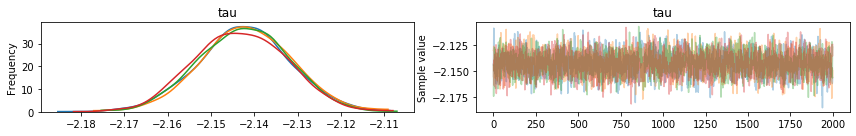

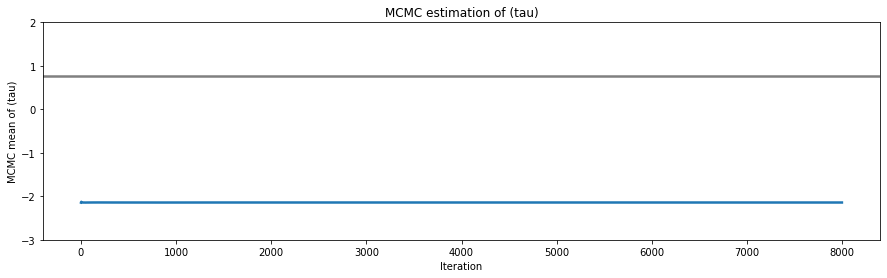

Number of Divergent 0
Percentage of Divergent 0.0


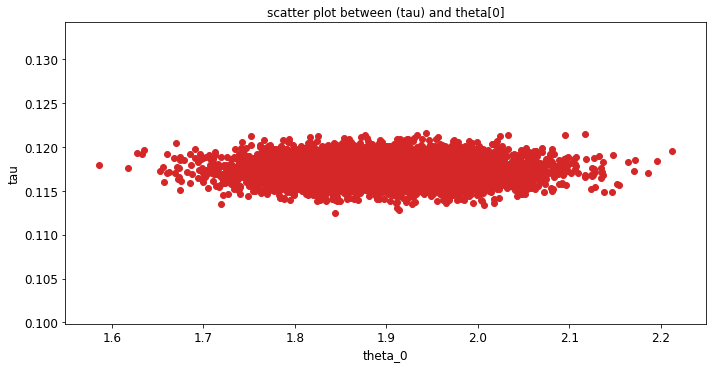

In [87]:
import matplotlib.pyplot as plt
report_trace(short_trace)

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(10, 6))

pm.pairplot(short_trace, sub_varnames=['theta_0', 'tau_log__'], ax=ax,
               color='C0', alpha=0.6, label='Centered, delta=0.80')

11541


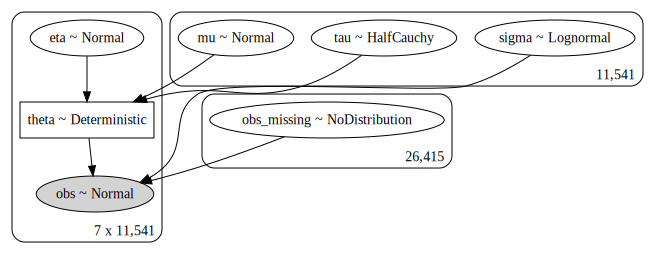

In [56]:
J=np.log(paces).T.shape
print(J[1])
pm.model_to_graphviz(hierarchial)

In [ ]:

with hierarchial:
    nuts_args = {
        "target_accept": 0.8
    }
    short_trace = pm.sample(3000, n_init=3000, tune=5000, random_seed=2019, 
                            #cores= multiprocessing.cpu_count() -1,
                            cores=8,
                            chains=4,
                            nuts_kwargs=nuts_args,
                           trace=[theta])
   

In [ ]:
#pm.summary(short_trace).round(2)
#np.exp(pm.summary(short_trace)[["mean", "sd"]]).round(3)

In [ ]:
#history[np.logical_and(history['num_valid_times'] >= 7, np.isnan(history["pace_7"]))][["name", "num_valid_times"]] 

In [ ]:
#runner["predicted_pace"] = np.exp(np.mean(short_trace["mu"], axis=0))
runner = runner.assign(predicted_pace = np.exp(np.mean(short_trace["mu"], axis=0)))
runner = runner.assign(predicted_pace_sigma = np.exp(np.mean(short_trace["sigma"], axis=0)))

runner["predicted_pace_sigma_fix"] = runner["predicted_pace_sigma"] - 0.8
runner["pred_pace_error"] = np.abs(runner["predicted_pace"] - runner["mean_pace"])
display(runner[["mean_team_id", "name", "num_valid_times", "mean_pace", "stdev", "prior_mean", "prior_std", 
                "predicted_pace", "pred_pace_error", "predicted_pace_sigma_fix"]].head(15))



In [ ]:
display(np.mean(runner['prior_mean_error']))
np.mean(runner["pred_pace_error"])

In [ ]:
display(np.mean(runner["pred_pace_error"]/runner["stdev"]))
display(np.mean(runner["pred_pace_error"]/runner["predicted_pace_sigma_fix"]))
display(np.mean(runner["prior_std"]/runner["predicted_pace_sigma_fix"]))


In [ ]:
display(np.mean(runner["predicted_pace_sigma_fix"]))

In [ ]:
pm.traceplot(short_trace, varnames=['mu', 'sigma'])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

%config InlineBackend.figure_format = 'retina'

# plot the estimate for the mean of log(τ) cumulating mean
logmu = np.exp(short_trace['mu'])
mlogmu = [np.mean(logmu[:i]) for i in np.arange(1, len(logmu))]
plt.figure(figsize=(15, 4))
#plt.axhline(14.383, lw=2.5, color='gray')
plt.plot(mlogmu, lw=2.5)
#plt.ylim(0, 2)
plt.xlabel('Iteration')
plt.ylabel('MCMC mean of log(mu)')
plt.title('MCMC estimation of log(mu)');

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

%config InlineBackend.figure_format = 'retina'

# plot the estimate for the mean of log(τ) cumulating mean
logtau = np.log(short_trace['tau'])
mlogtau = [np.mean(logtau[:i]) for i in np.arange(1, len(logtau))]
plt.figure(figsize=(15, 4))
#plt.axhline(14.383, lw=2.5, color='gray')
plt.plot(mlogtau, lw=2.5)
#plt.ylim(0, 2)
plt.xlabel('Iteration')
plt.ylabel('MCMC mean of log(tau)')
plt.title('MCMC estimation of log(tau)');